
--- ROLL-UP: Total Sales by Country ---
          Country  TotalSales
0        Ethiopia   390404.43
1           China   307317.17
2          Israel   243440.64
3            Peru   202389.03
4  Cayman Islands    50246.83


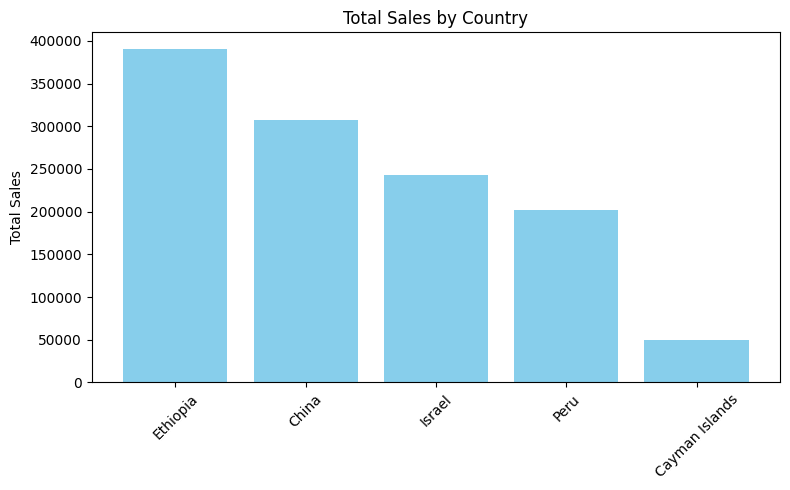


--- DRILL-DOWN: China Sales by Month ---
    Year  Month  MonthlySales
0   2023      8      16366.68
1   2023      9      12672.35
2   2023     10      10263.43
3   2023     11      11516.59
4   2023     12      11158.75
5   2024      1       9637.77
6   2024      2       8418.12
7   2024      3      12577.66
8   2024      4      11719.01
9   2024      5      12929.28
10  2024      6       5510.27
11  2024      7      20490.76
12  2024      8      10831.61
13  2024      9      15245.03
14  2024     10      14885.05
15  2024     11       6122.10
16  2024     12      13627.28
17  2025      1      21033.63
18  2025      2      13351.47
19  2025      3       6350.93
20  2025      4      15305.55
21  2025      5       9460.87
22  2025      6      14714.86
23  2025      7      20921.22
24  2025      8       2206.90

--- SLICE: Electronics Sales ---
      Category  TotalElectronicsSales
0  Electronics              170862.89


In [6]:
"""
OLAP Analysis Script
--------------------
This script connects to the SQLite Data Warehouse (retail_dw.db),
executes OLAP queries, and visualizes one of the results.
"""

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to SQLite DB
db_path = "retail_dw.db"

# Connect to database
conn = sqlite3.connect(db_path)

# ------------------------------
# Roll-up: Total Sales by Country (Visualization)
# ------------------------------
query_rollup = """
SELECT 
    c.Country,
    SUM(sf.Quantity * p.UnitPrice) AS TotalSales
FROM SalesFact sf
JOIN CustomerDim c ON sf.CustomerKey = c.CustomerKey
JOIN ProductDim p ON sf.ProductKey = p.ProductKey
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""

df_rollup = pd.read_sql(query_rollup, conn)
print("\n--- ROLL-UP: Total Sales by Country ---")
print(df_rollup)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_rollup["Country"], df_rollup["TotalSales"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Total Sales by Country")
plt.tight_layout()

# Save visualization
plt.savefig("sales_by_country.png")
plt.show()

# ------------------------------
# 2. Drill-down: China Sales by Month
# ------------------------------
query_drilldown = """
SELECT 
    t.Year,
    t.Month,
    SUM(sf.Quantity * p.UnitPrice) AS MonthlySales
FROM SalesFact sf
JOIN CustomerDim c ON sf.CustomerKey = c.CustomerKey
JOIN TimeDim t ON sf.DateKey = t.DateKey
JOIN ProductDim p ON sf.ProductKey = p.ProductKey
WHERE c.Country = 'China'
GROUP BY t.Year, t.Month
ORDER BY t.Year, t.Month;
"""

df_drilldown = pd.read_sql(query_drilldown, conn)
print("\n--- DRILL-DOWN: China Sales by Month ---")
print(df_drilldown)

# ------------------------------
# Slice: Electronics Category Sales
# ------------------------------
query_slice = """
SELECT 
    p.Category,
    SUM(sf.Quantity * p.UnitPrice) AS TotalElectronicsSales
FROM SalesFact sf
JOIN ProductDim p ON sf.ProductKey = p.ProductKey
WHERE p.Category = 'Electronics'
GROUP BY p.Category;
"""

df_slice = pd.read_sql(query_slice, conn)
print("\n--- SLICE: Electronics Sales ---")
print(df_slice)

# Close DB connection
conn.close()
